#Goal

Given two points 1 and 2, with 1 higher above the ground, what should be the shape of a potential path that makes a point moving from point 1 to point 2 in the shortest possible time?

# Setting up the problem

The time to travel from $1$ to $2$ is given by: time$(1 -> 2)$$= \int_{1}^{2} \frac{ds}{v}$

By conservation of energy we know that $v = \sqrt{2gy}$

Because this gives $v$ as a function of $y$ it is convenient to use $y$ as an independent variable. That is: the unknown $x = x(y)$

Now we can write the distance $ds$ between neighboring points on the path as:

$$ ds = \sqrt{dx^{2} + dy^{2}} = \sqrt{x'(y)^{2} + 1} dy $$

Substituting to the integral above:

$$\int_{1}^{2} \frac{ds}{v} = \int_{0}^{y_2} \frac{\sqrt{x'(y)^{2} + 1}}{\sqrt{2gy}}dy = \frac{1}{\sqrt{2g}}\int_{0}^{y_2} \frac{\sqrt{x'(y)^{2} + 1}}{\sqrt{y}}dy$$

Where our integrand is a function:

$$ f(x, x', y) = \frac{\sqrt{x'^{2} + 1}}{\sqrt{y}} $$

Now we seek the path that makes the time as small as possible so we'll find Euler-Lagrange equations handy:

$$ \frac{\partial f}{\partial x} = \frac{d}{dy}\frac{\partial f}{\partial x'} $$

Since $ \frac{\partial f}{\partial x} $ equals $0$ because $f$ does not depend on $x$ we conclude that $\frac{\partial f}{\partial x'}$ is constant.

$$ \frac{\partial f}{\partial x'} = \frac{x'}{\sqrt{x'^{2}+1}\sqrt{y}}$$

Squaring the above derivative and naming the constant $\frac{1}{2a}$  for future convenience we have:

$$ \frac{x'^2}{(x'^{2}+1)y} = constant = \frac{1}{2a} $$

Solving for $x'$:

$$ x' = \sqrt{\frac{y}{2a - y}} $$


Integrating both sides:

$$ x = \int \sqrt{\frac{y}{2a - y}} dy $$

This integral can be evaluated using not so common substitution $y = a(1 - \cos(\theta))$

Which gives:

$$ x = a \int \Big( 1 - \cos \theta \Big) d \theta = a(\theta - \sin \theta) + C $$

We have the parametric equations (with the parameter $\theta$) that give us the path of minimum time travel. By choosing cleverly our initial conditions $x = y = 0$ for point $1$ we see that the initial value of $\theta$ is zero, for us that means the constant of integration is zero, giving the final form of equations as:

$$ x(\theta) = a(\theta - \sin \theta) $$

$$ y(\theta) = a(1 - \cos \theta) $$

With the constant $a$ chosen so the curve passes through the given point $(x2, y2)$.

Dividing $y2 / x2$ we can obtain the equation:

$$ \frac{y2}{x2} = \frac{1 - \cos \theta_{2}}{\theta_{2} - \sin \theta_{2}}$$

Where $\theta_{2}$ (found numerically) gives us the final position on the curve.

From a trivial transformation one can obtain $a$ constant so the curve passes through final points.

$$ \frac{y2}{1 - \cos \theta_{2}} = a $$

# My solution

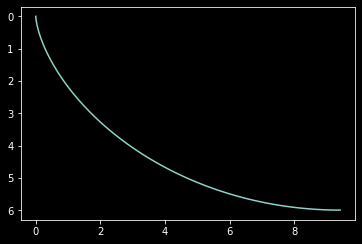

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as opt

g = 9.81 # m/s^2 , gravitational acceleration

def brachi(x2, y2, N=50):


  # Find theta2

  def final_position(theta):
    return (y2 / x2) - ((1 - np.cos(theta))/(theta - np.sin(theta)))

  theta2 = opt.newton(final_position, np.pi)

  # Generate "a" parameter

  a = y2 / (1 - np.cos(theta2))


  # Prepare data for plotting

  theta = np.linspace(0, theta2, N)

  x = a*(theta - np.sin(theta))
  y = a*(1 - np.cos(theta))


  # Find time of travel


  return (x, y, travel_t)


fig, ax = plt.subplots(1) 
plt.style.use(['dark_background'])


plt.gca().invert_yaxis()

ax.set_aspect(1)





